<a href="https://colab.research.google.com/github/teenwolf395/L6/blob/main/L6new1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
!pip install kaggle
!pip install catboost

In [111]:
from google.colab import files
import os
import shutil

# Шаг 1: Загружаем kaggle.json
print("Пожалуйста, загрузите файл kaggle.json:")
uploaded = files.upload()

# Проверяем, что файл загружен
if 'kaggle.json' not in uploaded:
    print("Ошибка: файл kaggle.json не найден среди загруженных файлов")
else:
    print("Файл kaggle.json успешно загружен")

    # Шаг 2: Настраиваем Kaggle API
    source_path = 'kaggle.json'
    destination_dir = os.path.expanduser('~/.kaggle')
    destination_path = os.path.join(destination_dir, 'kaggle.json')

    # Создаем директорию, если не существует
    os.makedirs(destination_dir, exist_ok=True)

    # Перемещаем файл
    shutil.move(source_path, destination_path)

    # Устанавливаем правильные права доступа
    os.chmod(destination_path, 0o600)

    print("Kaggle API настроен успешно")

    # Шаг 3: Скачиваем датасет
    print("Скачиваем датасет")
    !kaggle datasets download -d chik0di/health-and-lifestyle-dataset

    # Шаг 4: Распаковываем
    import zipfile
    with zipfile.ZipFile('health-and-lifestyle-dataset.zip', 'r') as zip_ref:
        zip_ref.extractall('.')

    print("Датасет готов к использованию!")

Пожалуйста, загрузите файл kaggle.json:


Saving kaggle.json to kaggle.json
Файл kaggle.json успешно загружен
Kaggle API настроен успешно
Скачиваем датасет
Dataset URL: https://www.kaggle.com/datasets/chik0di/health-and-lifestyle-dataset
License(s): CC0-1.0
health-and-lifestyle-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Датасет готов к использованию!


In [112]:
import pandas as pd

Health = pd.DataFrame()
try:
    if os.path.getsize('health_lifestyle_dataset.csv') > 0:
      Health = pd.read_csv('health_lifestyle_dataset.csv')
      type(Health)
      print('Файл проимпортирован\n')
    else:
      print('Файл пустой')
except OSError as e:
    print('Файла не существует')

Файл проимпортирован



In [113]:
print(Health.isnull().sum())

id                   0
age                  0
gender               0
bmi                  0
daily_steps          0
sleep_hours          0
water_intake_l       0
calories_consumed    0
smoker               0
alcohol              0
resting_hr           0
systolic_bp          0
diastolic_bp         0
cholesterol          0
family_history       0
disease_risk         0
dtype: int64


In [114]:
Health = Health.drop(columns=['id'])

In [115]:
import pandas as pd
import numpy as np

target_value = 0  # удаляем строки где smoker = 'Yes'

# Находим индексы строк с нужным значением
target_indices = Health[Health['smoker'] == target_value].index

# Проверяем, достаточно ли строк для удаления
if len(target_indices) >= 50000:
    # Случайно выбираем 50000 индексов для удаления
    indices_to_remove = np.random.choice(target_indices, size=50000, replace=False)

    # Удаляем выбранные строки
    Health_cleaned = Health.drop(indices_to_remove)

    print(f"Удалено 50000 строк с smoker = '{target_value}'")
    print(f"Исходный размер датасета: {len(Health)}")
    print(f"Новый размер датасета: {len(Health_cleaned)}")
else:
    print(f"Недостаточно строк для удаления. Найдено только {len(target_indices)} строк с smoker = '{target_value}'")

Удалено 50000 строк с smoker = '0'
Исходный размер датасета: 100000
Новый размер датасета: 50000


In [116]:
import pandas as pd
import numpy as np

print(f"Исходный размер: {Health_cleaned.shape}")
# Исходный датасет
Health_cleaned = pd.DataFrame(Health_cleaned)  # ваш датасет

# Удаление 45,000 случайных строк
n_to_remove = 45000
indices_to_remove = np.random.choice(Health_cleaned.index, n_to_remove, replace=False)
Health_cleaned = Health_cleaned.drop(indices_to_remove)


print(f"Новый размер: {Health_cleaned.shape}")

Исходный размер: (50000, 15)
Новый размер: (5000, 15)


In [117]:
!pip install ydata-profiling

In [118]:
print(f"размер датасета: {len(Health_cleaned)}")

размер датасета: 5000



1. Названия колонок:
['age', 'gender', 'bmi', 'daily_steps', 'sleep_hours', 'water_intake_l', 'calories_consumed', 'smoker', 'alcohol', 'resting_hr', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'family_history', 'disease_risk']

2. Типы данных:
age                    int64
gender                object
bmi                  float64
daily_steps            int64
sleep_hours          float64
water_intake_l       float64
calories_consumed      int64
smoker                 int64
alcohol                int64
resting_hr             int64
systolic_bp            int64
diastolic_bp           int64
cholesterol            int64
family_history         int64
disease_risk           int64
dtype: object

3. Форма датасета (строки, колонки):
(5000, 15)

=== Подробная информация ===
<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 38 to 99986
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                

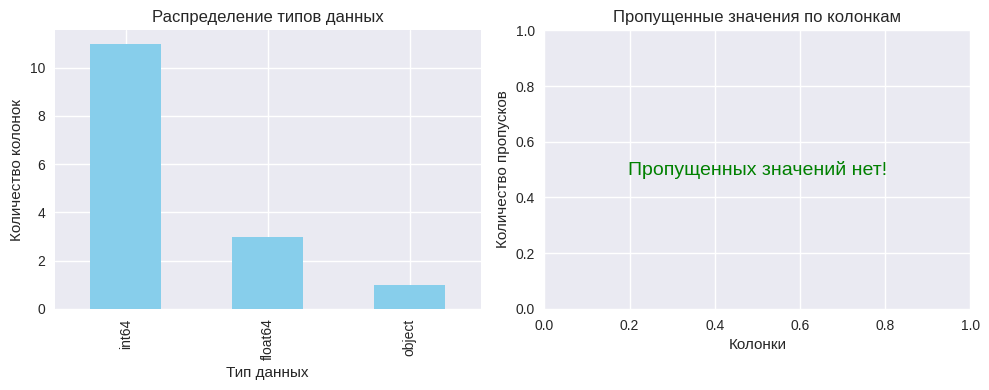


=== Генерация полного отчета ===


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:00<00:00, 19.19it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Анализ завершен!


In [119]:
import pandas as pd
import numpy as np

df = pd.DataFrame(Health_cleaned)

# Базовая информация о колонках
print("\n1. Названия колонок:")
print(df.columns.tolist())

print("\n2. Типы данных:")
print(df.dtypes)

print("\n3. Форма датасета (строки, колонки):")
print(df.shape)

# Подробная информация с помощью info()
print("\n=== Подробная информация ===")
df.info()

# Статистика по числовым колонкам
print("\n=== Статистика по числовым колонкам ===")
print(df.describe())

# Статистика по всем колонкам (включая категориальные)
print("\n=== Статистика по всем колонкам ===")
print(df.describe(include='all'))

# Просмотр первых строк для понимания данных
print("\n=== Первые 5 срок датасета ===")
print(df.head())

# Проверка на пропущенные значения
print("\n=== Пропущенные значения ===")
print(df.isnull().sum())

# Уникальные значения для каждой колонки
print("\n=== Уникальные значения ===")
for column in df.columns:
    unique_count = df[column].nunique()
    print(f"{column}: {unique_count} уникальных значений")
    if unique_count <= 10:  # Показываем значения только если их немного
        print(f"   Значения: {df[column].unique()}")

# Дополнительная информация о каждой колонке
print("\n=== Детальная информация о каждой колонке ===")
for column in df.columns:
    print(f"\n--- {column} ---")
    print(f"Тип данных: {df[column].dtype}")
    print(f"Количество non-null значений: {df[column].count()}")
    print(f"Количество уникальных значений: {df[column].nunique()}")

    if df[column].dtype in ['int64', 'float64']:
        print(f"Минимальное значение: {df[column].min()}")
        print(f"Максимальное значение: {df[column].max()}")
        print(f"Среднее значение: {df[column].mean():.2f}")

    if df[column].dtype == 'object':
        print(f"Пример значений: {df[column].iloc[:3].tolist()}")

# Визуальное представление информации о данных
print("\n=== Визуализация ===")
import matplotlib.pyplot as plt

# Информация о типах данных
type_counts = df.dtypes.value_counts()
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
type_counts.plot(kind='bar', color='skyblue')
plt.title('Распределение типов данных')
plt.xlabel('Тип данных')
plt.ylabel('Количество колонок')


plt.subplot(1, 2, 2)
missing_values = df.isnull().sum()
if (missing_values > 0).any():
    missing_values[missing_values > 0].plot(kind='bar', color='lightcoral')
    plt.title('Пропущенные значения по колонкам')
    plt.xlabel('Колонки')
    plt.ylabel('Количество пропусков')
else:
    # Если пропусков нет, показываем сообщение
    plt.text(0.5, 0.5, 'Пропущенных значений нет!',
             horizontalalignment='center', verticalalignment='center',
             transform=plt.gca().transAxes, fontsize=14, color='green')
    plt.title('Пропущенные значения по колонкам')
    plt.xlabel('Колонки')
    plt.ylabel('Количество пропусков')

plt.tight_layout()
plt.show()

# Использование pandas-profiling для полного отчета

from ydata_profiling import ProfileReport

print("\n=== Генерация полного отчета ===")
profile = ProfileReport(df, title="Полный отчет о датасете")
profile.to_file("report.html")  # Сохраняем в файл

print("Анализ завершен!")

In [120]:
# Установка необходимых библиотек
!pip install seaborn scipy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Настройка отображения графиков
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

In [121]:
print("Статистический анализ числовых колонок")
print("=" * 50)

# Выбираем только числовые колонки
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(f"Числовые колонки: {list(numeric_cols)}")

stats_summary = []
for col in numeric_cols:
    stats_summary.append({
        'Колонка': col,
        'Медиана': df[col].median(),
        'СКО': df[col].std(),
        'Асимметрия': df[col].skew(),
        'Эксцесс': df[col].kurtosis(),
        'Квартиль 25%': df[col].quantile(0.25),
        'Квартиль 75%': df[col].quantile(0.75),
        'IQR': df[col].quantile(0.75) - df[col].quantile(0.25)
    })

stats_df = pd.DataFrame(stats_summary)
print( stats_df.round(3))

Статистический анализ числовых колонок
Числовые колонки: ['age', 'bmi', 'daily_steps', 'sleep_hours', 'water_intake_l', 'calories_consumed', 'smoker', 'alcohol', 'resting_hr', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'family_history', 'disease_risk']
              Колонка  Медиана       СКО  Асимметрия  Эксцесс  Квартиль 25%  \
0                 age     49.0    17.696       0.005   -1.175         34.00   
1                 bmi     29.1     6.365      -0.009   -1.191         23.50   
2         daily_steps  10465.0  5498.909       0.010   -1.202       5707.25   
3         sleep_hours      6.5     2.004      -0.015   -1.178          4.80   
4      water_intake_l      2.7     1.297      -0.020   -1.184          1.60   
5   calories_consumed   2599.0   811.966      -0.001   -1.215       1891.00   
6              smoker      0.0     0.490       0.405   -1.837          0.00   
7             alcohol      0.0     0.458       0.879   -1.227          0.00   
8          resting_hr     74.0   

In [122]:
print("Анализ категориальных колонок")
print("=" * 50)

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(f"Категориальные колонки: {list(categorical_cols)}")

for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(f"Количество уникальных значений: {df[col].nunique()}")
    print(f"Топ-5 самых частых значений:")
    print(df[col].value_counts().head())

Анализ категориальных колонок
Категориальные колонки: ['gender']

--- gender ---
Количество уникальных значений: 2
Топ-5 самых частых значений:
gender
Female    2546
Male      2454
Name: count, dtype: int64


Распределение




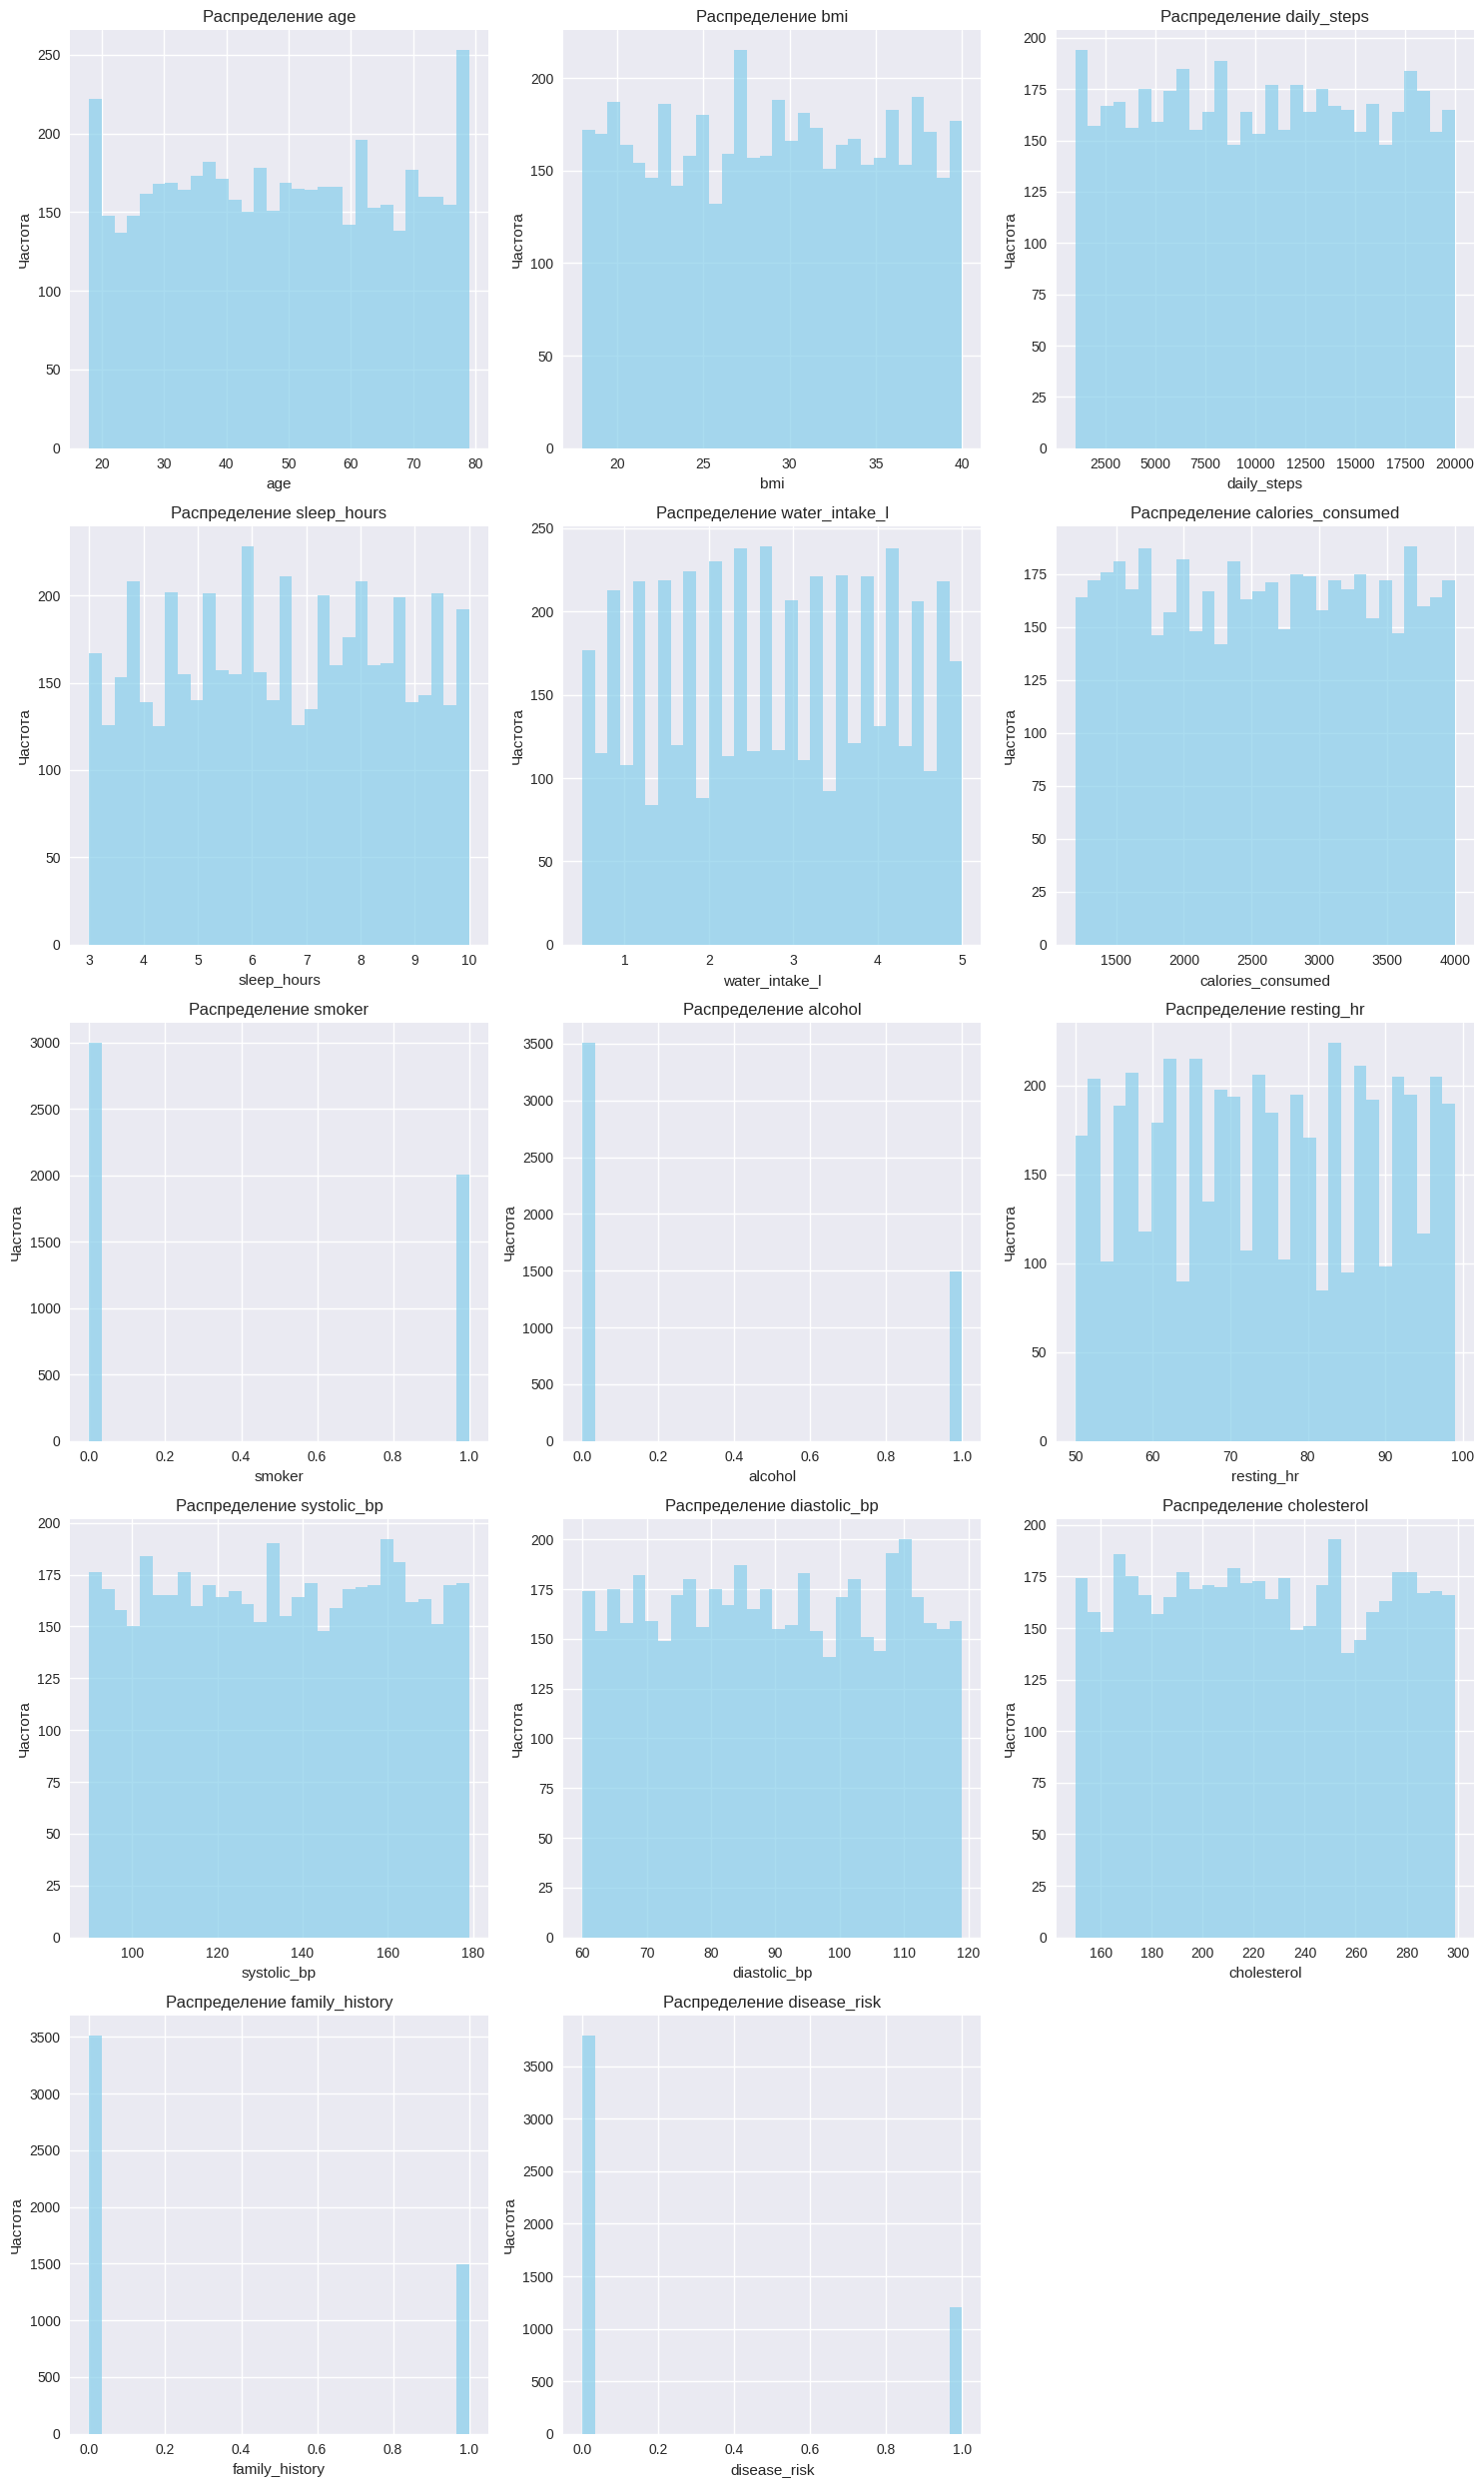

In [123]:
print("Распределение")
print("\n")

# Гистограммы для числовых колонок
if len(numeric_cols) > 0:
    n_cols = min(3, len(numeric_cols))
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if len(numeric_cols) > 1 else [axes]

    for i, col in enumerate(numeric_cols):
        if i < len(axes):
            df[col].hist(bins=30, ax=axes[i], alpha=0.7, color='skyblue')
            axes[i].set_title(f'Распределение {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Частота')

    # Скрываем пустые subplots
    for i in range(len(numeric_cols), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

Анализ выбросов
              Колонка  Выбросы  Процент
0                 age        0      0.0
1                 bmi        0      0.0
2         daily_steps        0      0.0
3         sleep_hours        0      0.0
4      water_intake_l        0      0.0
5   calories_consumed        0      0.0
6              smoker        0      0.0
7             alcohol        0      0.0
8          resting_hr        0      0.0
9         systolic_bp        0      0.0
10       diastolic_bp        0      0.0
11        cholesterol        0      0.0
12     family_history        0      0.0


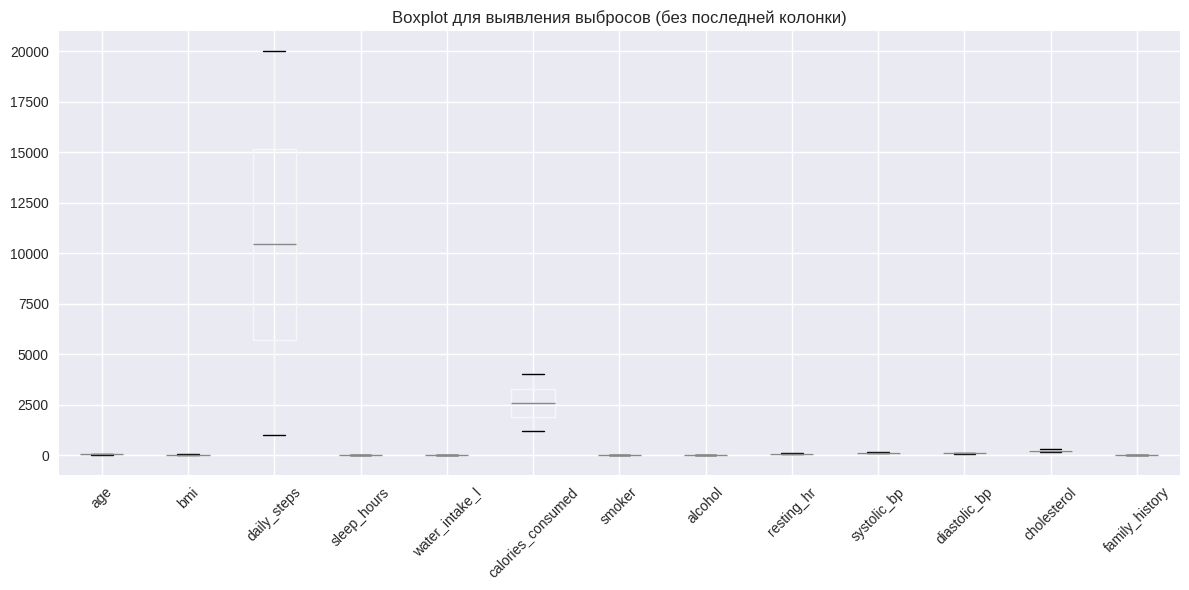

In [124]:
print("Анализ выбросов")
print("=" * 50)

def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Определяем числовые колонки
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(numeric_cols) > 0:
    numeric_cols = numeric_cols[:-1]

outliers_summary = []
for col in numeric_cols:
    outliers = detect_outliers_iqr(df[col].dropna())
    outlier_percent = (len(outliers) / len(df[col].dropna())) * 100
    outliers_summary.append({
        'Колонка': col,
        'Выбросы': len(outliers),
        'Процент': outlier_percent
    })

outliers_df = pd.DataFrame(outliers_summary)
print(outliers_df)

# Boxplot для визуализации выбросов
if len(numeric_cols) > 0:
    plt.figure(figsize=(12, 6))
    df[numeric_cols].boxplot()
    plt.title('Boxplot для выявления выбросов (без последней колонки)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Корреляционный анализ
Матрица корреляций:
                     age    bmi  daily_steps  sleep_hours  water_intake_l  \
age                1.000  0.015        0.021        0.023          -0.009   
bmi                0.015  1.000        0.009        0.007          -0.001   
daily_steps        0.021  0.009        1.000        0.012          -0.007   
sleep_hours        0.023  0.007        0.012        1.000          -0.027   
water_intake_l    -0.009 -0.001       -0.007       -0.027           1.000   
calories_consumed -0.011 -0.002       -0.007       -0.010          -0.038   
smoker            -0.011 -0.004       -0.008       -0.012          -0.000   
alcohol           -0.003 -0.004       -0.009       -0.012          -0.013   
resting_hr         0.014 -0.023       -0.002       -0.026          -0.013   
systolic_bp        0.013  0.011       -0.009        0.011          -0.019   
diastolic_bp       0.004  0.007       -0.004        0.005          -0.007   
cholesterol       -0.012 -0.021   

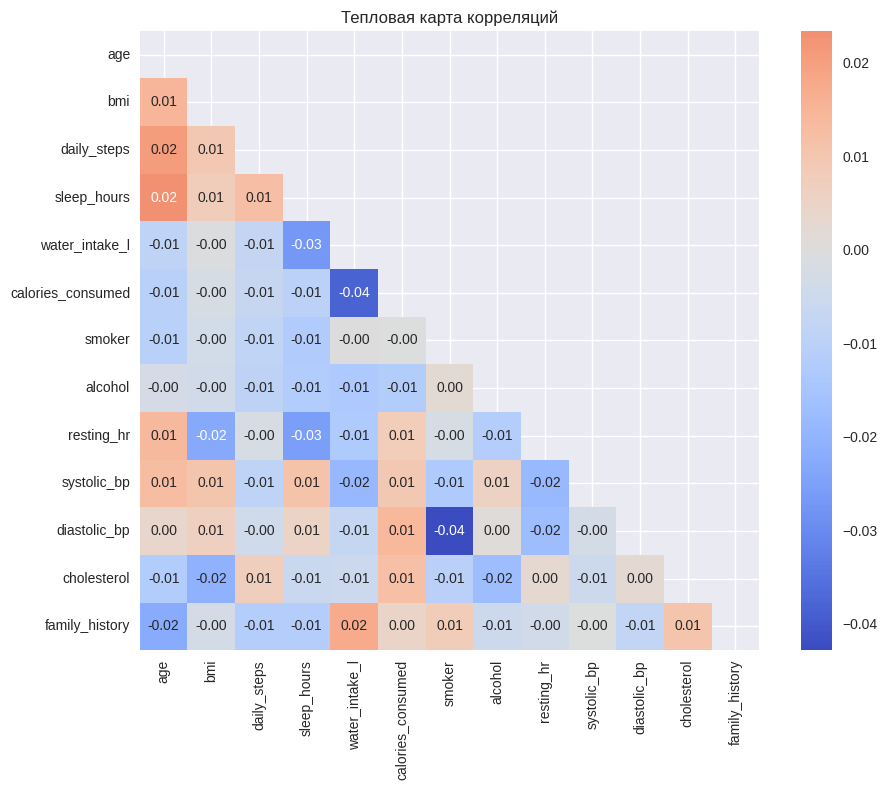


 Сильных корреляций не обнаружено


In [125]:
print("Корреляционный анализ")
print("=" * 50)

if len(numeric_cols) > 1:
    # Матрица корреляций
    correlation_matrix = df[numeric_cols].corr()
    print("Матрица корреляций:")
    print(correlation_matrix.round(3))

    # Тепловая карта корреляций
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
                center=0, square=True, fmt='.2f')
    plt.title('Тепловая карта корреляций')
    plt.tight_layout()
    plt.show()

    # Поиск сильных корреляций
    strong_correlations = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr = correlation_matrix.iloc[i, j]
            if abs(corr) > 0.7:
                strong_correlations.append({
                    'Колонка 1': correlation_matrix.columns[i],
                    'Колонка 2': correlation_matrix.columns[j],
                    'Корреляция': corr
                })

    if strong_correlations:
        print("\nСильные корреляции (|r| > 0.7):")
        strong_corr_df = pd.DataFrame(strong_correlations)
        print(strong_corr_df.round(3))
    else:
        print("\n Сильных корреляций не обнаружено")

Анализ взаимосвязей между переменными


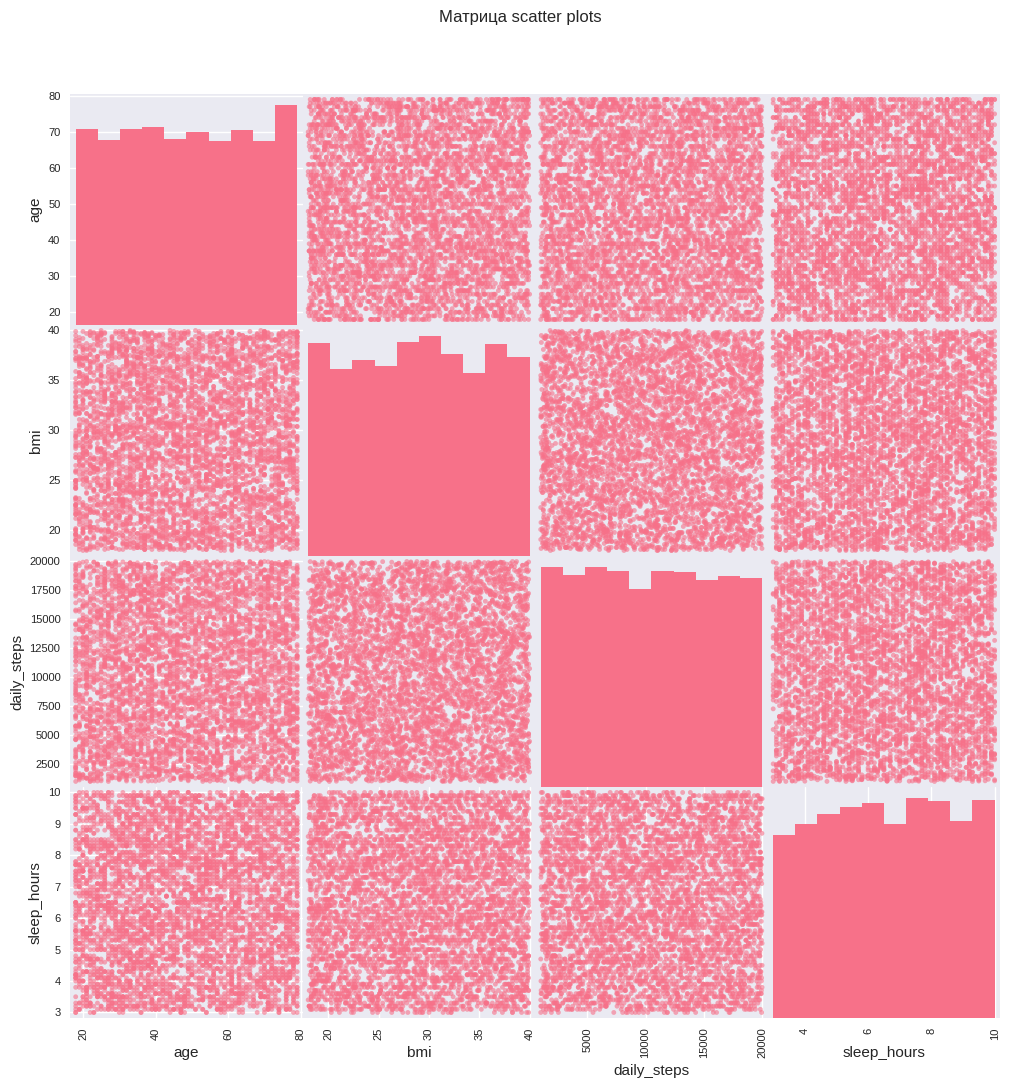

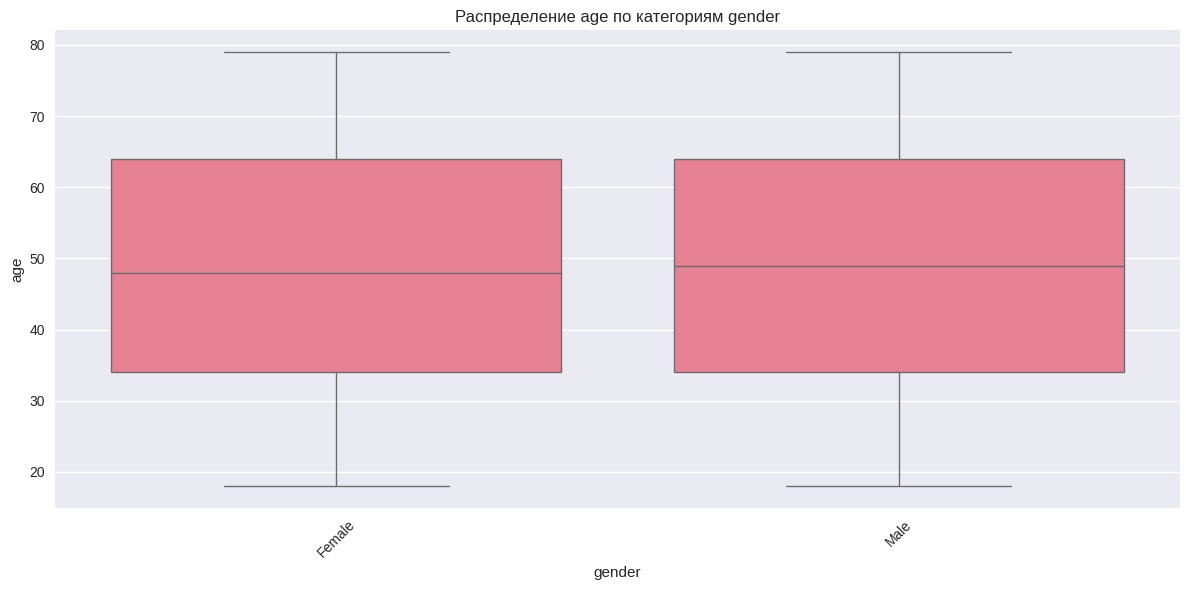

In [126]:
print("Анализ взаимосвязей между переменными")
print("=" * 50)

# Scatter plot для числовых переменных
if len(numeric_cols) >= 2:
    # Берем первые 4 числовые колонки для scatter matrix
    scatter_cols = numeric_cols[:4]
    pd.plotting.scatter_matrix(df[scatter_cols], alpha=0.6, figsize=(12, 12))
    plt.suptitle('Матрица scatter plots', y=0.95)
    plt.show()

# Анализ категориальных vs числовых переменных
if len(categorical_cols) > 0 and len(numeric_cols) > 0:
    cat_col = categorical_cols[0]
    num_col = numeric_cols[0]

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=cat_col, y=num_col)
    plt.title(f'Распределение {num_col} по категориям {cat_col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [127]:
print("Итоговый отчет EDA")
print("=" * 60)

print("Основные выводы:")
print(f"- Общий размер датасета: {df.shape[0]} строк, {df.shape[1]} колонок")
print(f"- Числовых колонок: {len(numeric_cols)}")
print(f"- Категориальных колонок: {len(categorical_cols)}")
print(f"- Пропущенных значений: {df.isnull().sum().sum()}")

if len(numeric_cols) > 0:
    high_skew = stats_df[abs(stats_df['Асимметрия']) > 1]['Колонка'].tolist()
    if high_skew:
        print(f"- Колонки с высокой асимметрией: {high_skew}")

if 'outliers_df' in locals():
    high_outliers = outliers_df[outliers_df['Процент'] > 5]['Колонка'].tolist()
    if high_outliers:
        print(f"- Колонки с большим количеством выбросов (>5%): {high_outliers}")
print("EDA анализ завершен!")

Итоговый отчет EDA
Основные выводы:
- Общий размер датасета: 5000 строк, 15 колонок
- Числовых колонок: 13
- Категориальных колонок: 1
- Пропущенных значений: 0
- Колонки с высокой асимметрией: ['disease_risk']
EDA анализ завершен!


In [128]:
Health_cleaned1=pd.DataFrame(Health_cleaned)
if 'gender' in Health_cleaned1.columns:
    print(f"Уникальные значения до преобразования: {Health_cleaned['gender'].unique()}")

    # Кодируем текстовые значения M/F в числа
    gender_encoder = LabelEncoder()
    Health_cleaned1['gender'] = gender_encoder.fit_transform(Health_cleaned['gender'])

    # Создаем mapping для обратного преобразования
    gender_mapping = {i: label for i, label in enumerate(gender_encoder.classes_)}
    print(f"Преобразование: {gender_mapping}")

    print(f"Уникальные значения после преобразования: {sorted(Health_cleaned1['gender'].unique())}")
    print(f"Распределение после: {Health_cleaned1['gender'].value_counts().to_dict()}")
else:
    print(f"Колонка GENDER не найдена в датасете")

Уникальные значения до преобразования: ['Female' 'Male']
Преобразование: {0: 'Female', 1: 'Male'}
Уникальные значения после преобразования: [np.int64(0), np.int64(1)]
Распределение после: {0: 2546, 1: 2454}


In [129]:
Health_cleaned1.info()
print("\n=== ДЕТАЛЬНАЯ ИНФОРМАЦИЯ ПО КАЖДОЙ КОЛОНКЕ ===")
for column in Health_cleaned1.columns:
    print(f"\n--- {column} ---")
    print(f"Тип данных: {Health_cleaned1[column].dtype}")
    print(f"Количество non-null значений: {Health_cleaned1[column].count()}")
    print(f"Количество уникальных значений: {Health_cleaned1[column].nunique()}")

    if Health_cleaned1[column].dtype in ['int64', 'float64']:
        print(f"Минимальное значение: {Health_cleaned1[column].min()}")
        print(f"Максимальное значение: {Health_cleaned1[column].max()}")
        print(f"Среднее значение: {Health_cleaned1[column].mean():.2f}")

    if Health_cleaned1[column].dtype == 'object':
        print(f"Пример значений: {Health_cleaned1[column].iloc[:3].tolist()}")

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 38 to 99986
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5000 non-null   int64  
 1   gender             5000 non-null   int64  
 2   bmi                5000 non-null   float64
 3   daily_steps        5000 non-null   int64  
 4   sleep_hours        5000 non-null   float64
 5   water_intake_l     5000 non-null   float64
 6   calories_consumed  5000 non-null   int64  
 7   smoker             5000 non-null   int64  
 8   alcohol            5000 non-null   int64  
 9   resting_hr         5000 non-null   int64  
 10  systolic_bp        5000 non-null   int64  
 11  diastolic_bp       5000 non-null   int64  
 12  cholesterol        5000 non-null   int64  
 13  family_history     5000 non-null   int64  
 14  disease_risk       5000 non-null   int64  
dtypes: float64(3), int64(12)
memory usage: 754.0 KB

=== ДЕТАЛЬНАЯ ИНФОРМАЦИЯ П

Первые 5 строк датасета:
     age  gender   bmi  daily_steps  sleep_hours  water_intake_l  \
38    44       0  22.1         7855         10.0             3.2   
51    72       1  18.9         5432          6.9             1.1   
119   70       0  28.0         3600          7.7             2.3   
137   61       1  21.8        16923          4.9             2.2   
141   68       0  24.9        13527          9.4             1.6   

     calories_consumed  smoker  alcohol  resting_hr  systolic_bp  \
38                3083       1        0          72          112   
51                1925       1        1          86          154   
119               1614       1        0          64           91   
137               3721       0        0          56          107   
141               1509       0        1          59          105   

     diastolic_bp  cholesterol  family_history  disease_risk  
38             70          296               0             1  
51             79          173 

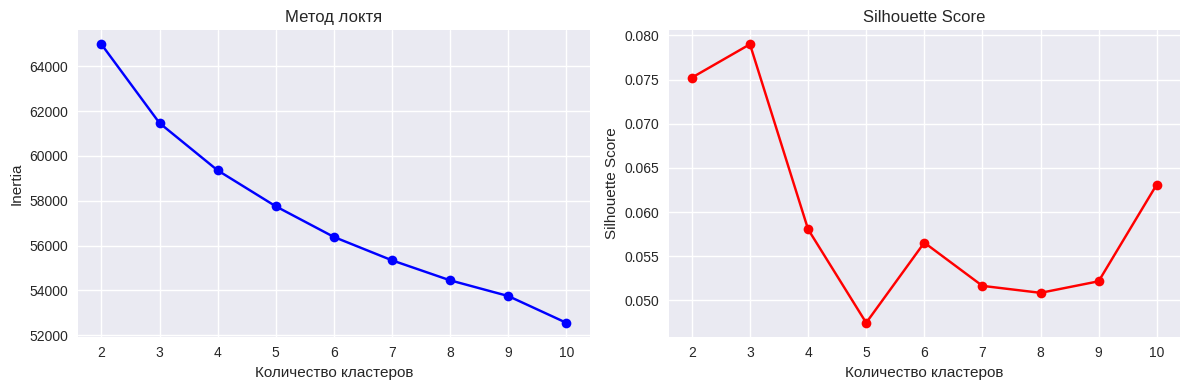

Выбрано оптимальное число кластеров: 3

=== K-MEANS CLUSTERING ===
K-Means Silhouette Score: 0.0790

=== GAUSSIAN MIXTURE MODELS ===
GMM Silhouette Score: 0.0647

=== AGGLOMERATIVE CLUSTERING ===
Agglomerative Silhouette Score: 0.0713

=== BIRCH CLUSTERING ===
BIRCH Silhouette Score: 0.0610

=== SPECTRAL CLUSTERING ===
Spectral Clustering Silhouette Score: -0.0005

Сводим результаты отдельных методов
K-Means: 0.0790
GMM: 0.0647
Agglomerative: 0.0713
BIRCH: 0.0610
Spectral: -0.0005

Лучший индивидуальный метод: K-Means (Score: 0.0790)

Ансамбль методов - Weighted Voting
Веса методов в ансамбле:
  K-Means: 0.287
  GMM: 0.235
  Agglomerative: 0.259
  BIRCH: 0.221
  Spectral: -0.002

Weighted Voting Silhouette Score: 0.0369

Сравнение методов
K-Means: 0.0790
GMM: 0.0647
Agglomerative: 0.0713
BIRCH: 0.0610
Spectral: -0.0005
Ensemble Weighted: 0.0369

 Лучший метод из всех: K-Means (Score: 0.0790)

=== Визуализация результатов ===
Объясненная дисперсия PCA: 0.154


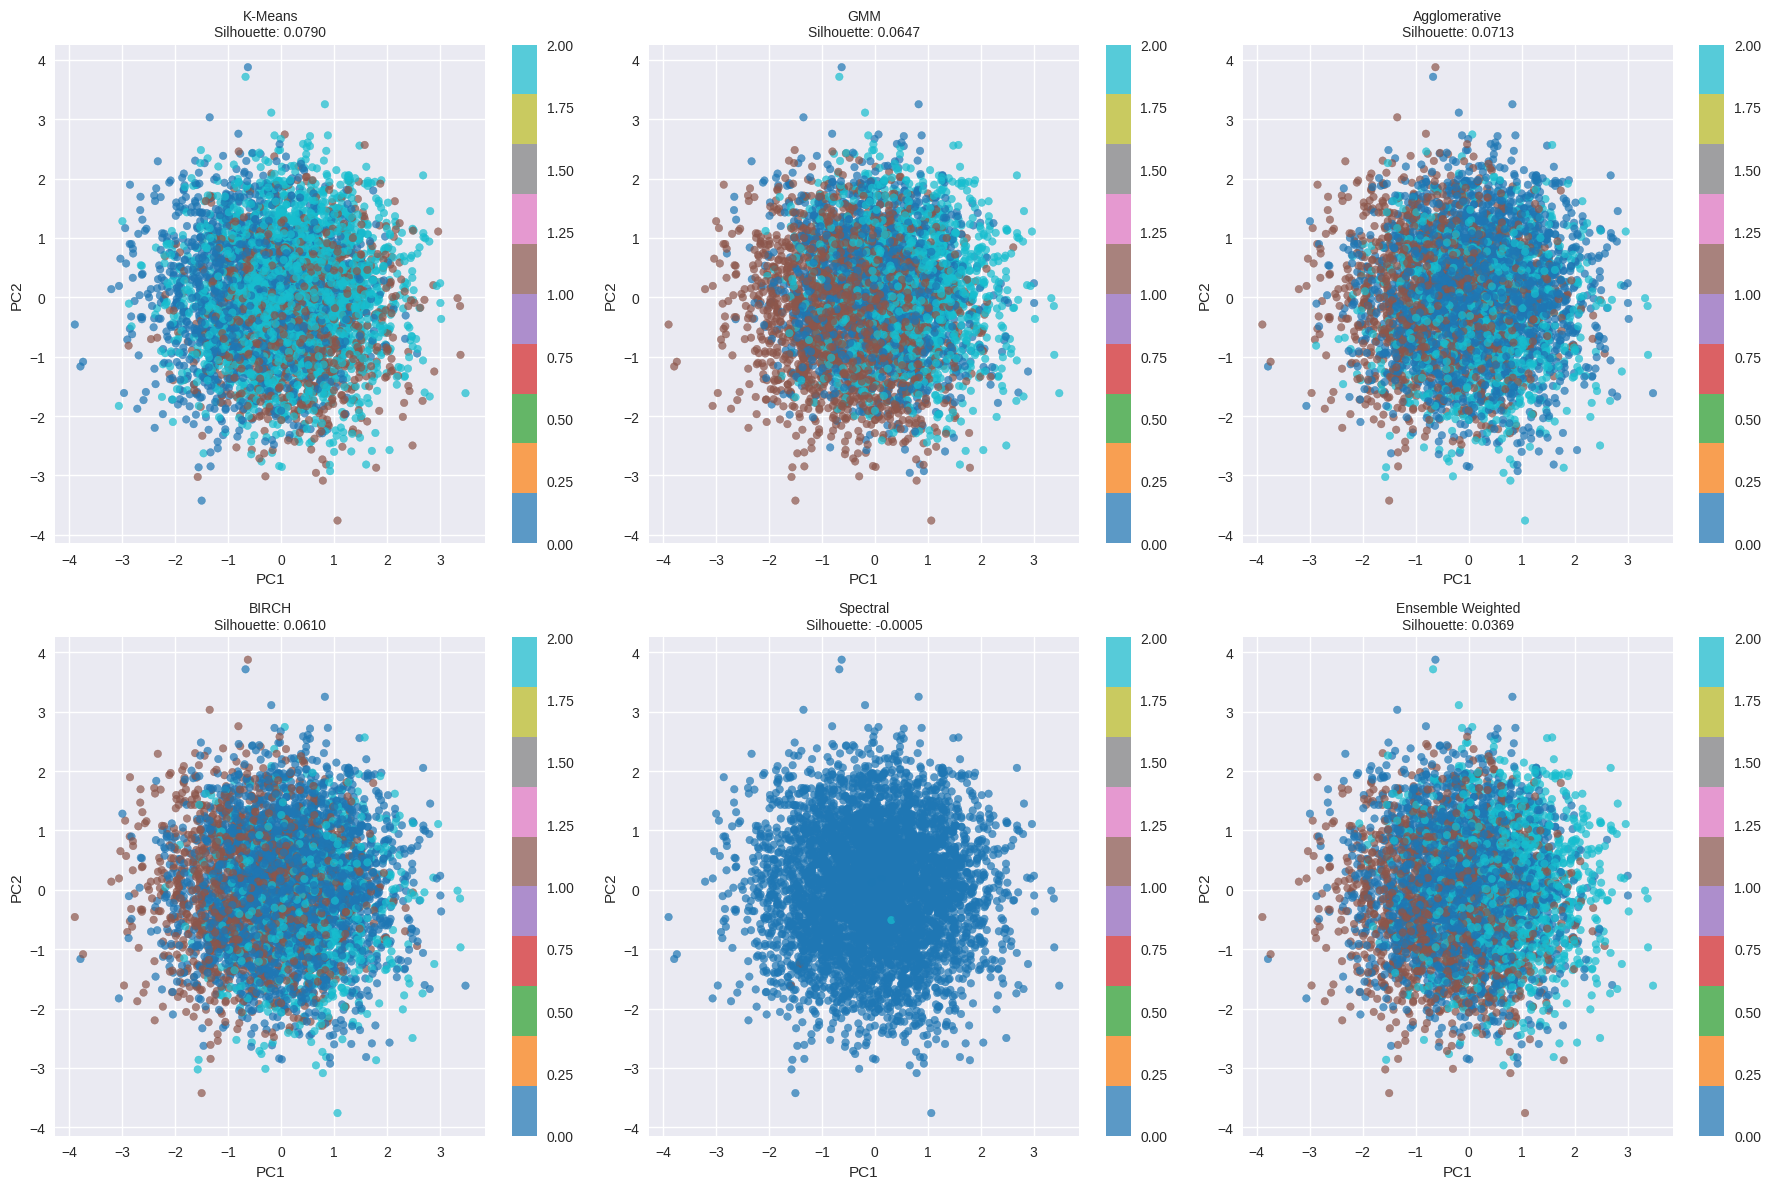


=== Детальный анализ лучшего метода ===
Используется индивидуальный метод K-Means

 Анализ кластеров лучшего метода (K-Means):

--- КЛластер 0 (размер: 1491, 29.8%) ---
 Повышенные показатели:
  calories_consumed: +6.09 (+0.2%)
  cholesterol: +0.72 (+0.3%)
  family_history: +0.70 (+235.3%)
 Пониженные показатели:
  daily_steps: -98.06 (-0.9%)
  age: -0.61 (-1.3%)
  diastolic_bp: -0.21 (-0.2%)
 Риск заболевания: 24.5%

--- КЛластер 1 (размер: 1054, 21.1%) ---
 Повышенные показатели:
  alcohol: +0.70 (+234.7%)
  age: +0.45 (+0.9%)
  diastolic_bp: +0.28 (+0.3%)
 Пониженные показатели:
  daily_steps: -16.71 (-0.2%)
  calories_consumed: -3.18 (-0.1%)
  cholesterol: -1.87 (-0.8%)
 Риск заболевания: 24.3%

--- КЛластер 2 (размер: 2455, 49.1%) ---
 Повышенные показатели:
  daily_steps: +66.73 (+0.6%)
  cholesterol: +0.36 (+0.2%)
  age: +0.18 (+0.4%)
 Пониженные показатели:
  calories_consumed: -2.33 (-0.1%)
  alcohol: -0.30 (-100.0%)
  family_history: -0.30 (-100.0%)
 Риск заболевания: 24.0%


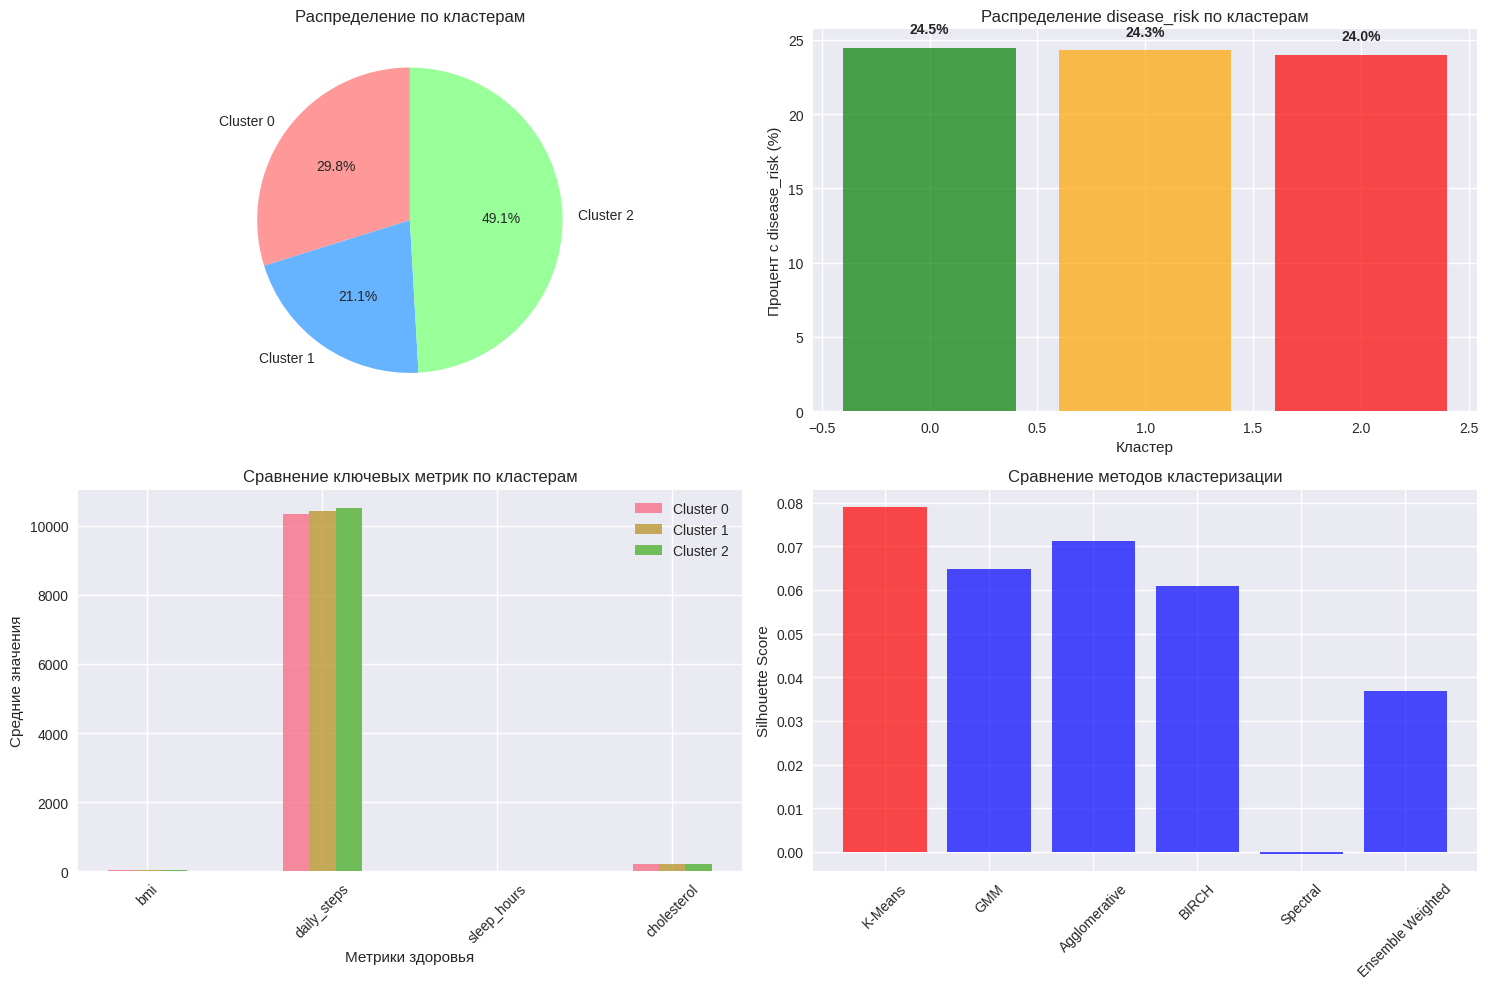


Итого
Размер датасета: (5000, 21)
Оптимальное число кластеров: 3
Лучший метод: K-Means
Качество кластеризации (Silhouette): 0.0790

 Использованные методы кластеризации:
   - K-Means - centroid-based clustering
   - Gaussian Mixture Models - probabilistic clustering
   - Agglomerative Clustering - hierarchical clustering
   - BIRCH - hierarchical clustering для больших данных
   - Spectral Clustering - graph-based clustering
   - Ensemble Weighted Voting - взвешенное голосование

 Результат ансамбля:
   - Weighted Voting: 0.0369

Вывод: лучшая сегментация достигнута методом: K-Means


In [130]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

df = pd.DataFrame(Health_cleaned1)

print("Первые 5 строк датасета:")
print(df.head())
print(f"\nРазмер датасета: {df.shape}")

# Предобработка данных
print("\n=== Предобработка данных ===")

# Выбор признаков для кластеризации
features = ['age', 'gender','bmi', 'daily_steps', 'sleep_hours', 'water_intake_l', 'calories_consumed', 'resting_hr', 'systolic_bp', 'diastolic_bp', 'cholesterol',  'smoker', 'alcohol', 'family_history']

X = df[features]

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Размерность данных после масштабирования: {X_scaled.shape}")

# Определение оптимального числа кластеров
print("\n=== Определение оптимального числа кластеров ===")

inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    if len(np.unique(labels)) > 1:
        score = silhouette_score(X_scaled, labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(0)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.title('Метод локтя')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Количество кластеров')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

# Выбираем оптимальное число кластеров
optimal_clusters = k_range[np.argmax(silhouette_scores)]
print(f"Выбрано оптимальное число кластеров: {optimal_clusters}")

# K-MEANS CLUSTERING
print("\n=== K-MEANS CLUSTERING ===")
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
df['kmeans_cluster'] = kmeans_labels
kmeans_score = silhouette_score(X_scaled, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_score:.4f}")

# GAUSSIAN MIXTURE MODELS
print("\n=== GAUSSIAN MIXTURE MODELS ===")
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
df['gmm_cluster'] = gmm_labels
gmm_score = silhouette_score(X_scaled, gmm_labels)
print(f"GMM Silhouette Score: {gmm_score:.4f}")

# AGGLOMERATIVE CLUSTERING
print("\n=== AGGLOMERATIVE CLUSTERING ===")
agglo = AgglomerativeClustering(n_clusters=optimal_clusters)
agglo_labels = agglo.fit_predict(X_scaled)
df['agglo_cluster'] = agglo_labels
agglo_score = silhouette_score(X_scaled, agglo_labels)
print(f"Agglomerative Silhouette Score: {agglo_score:.4f}")

# BIRCH CLUSTERING
print("\n=== BIRCH CLUSTERING ===")
birch = Birch(n_clusters=optimal_clusters, threshold=0.5, branching_factor=50)
birch_labels = birch.fit_predict(X_scaled)
df['birch_cluster'] = birch_labels
birch_score = silhouette_score(X_scaled, birch_labels)
print(f"BIRCH Silhouette Score: {birch_score:.4f}")

# SPECTRAL CLUSTERING
print("\n=== SPECTRAL CLUSTERING ===")
spectral = SpectralClustering(n_clusters=optimal_clusters, random_state=42, affinity='rbf')
spectral_labels = spectral.fit_predict(X_scaled)
df['spectral_cluster'] = spectral_labels
spectral_score = silhouette_score(X_scaled, spectral_labels)
print(f"Spectral Clustering Silhouette Score: {spectral_score:.4f}")

# Сводка результатов отдельных методов
print("\n" + "="*60)
print("Сводим результаты отдельных методов")
print("="*60)
methods_scores = {
    'K-Means': kmeans_score,
    'GMM': gmm_score,
    'Agglomerative': agglo_score,
    'BIRCH': birch_score,
    'Spectral': spectral_score
}

for method, score in methods_scores.items():
    print(f"{method}: {score:.4f}")

best_individual_method = max(methods_scores, key=methods_scores.get)
print(f"\nЛучший индивидуальный метод: {best_individual_method} (Score: {methods_scores[best_individual_method]:.4f})")

# АНСАМБЛЬ МОДЕЛЕЙ - Weighted Voting
print("\n" + "="*60)
print("Ансамбль методов - Weighted Voting")
print("="*60)

# Создаем матрицу предсказаний всех методов
cluster_predictions = np.column_stack([
    kmeans_labels,
    gmm_labels,
    agglo_labels,
    birch_labels,
    spectral_labels
])

# Weighted Voting (взвешенное голосование)
weights = np.array([kmeans_score, gmm_score, agglo_score, birch_score, spectral_score])
weights = weights / weights.sum()  # Нормализуем веса

print("Веса методов в ансамбле:")
for method, weight in zip(methods_scores.keys(), weights):
    print(f"  {method}: {weight:.3f}")

# Взвешенное голосование
weighted_predictions = np.zeros((len(X_scaled), optimal_clusters))
for i in range(cluster_predictions.shape[1]):
    for j in range(optimal_clusters):
        mask = (cluster_predictions[:, i] == j)
        weighted_predictions[mask, j] += weights[i]

ensemble_weighted = np.argmax(weighted_predictions, axis=1)
df['ensemble_weighted'] = ensemble_weighted
ensemble_weighted_score = silhouette_score(X_scaled, ensemble_weighted)
print(f"\nWeighted Voting Silhouette Score: {ensemble_weighted_score:.4f}")

# Сравнение всех методов
print("\n" + "="*60)
print("Сравнение методов")
print("="*60)

all_methods_scores = {
    'K-Means': kmeans_score,
    'GMM': gmm_score,
    'Agglomerative': agglo_score,
    'BIRCH': birch_score,
    'Spectral': spectral_score,
    'Ensemble Weighted': ensemble_weighted_score
}

for method, score in all_methods_scores.items():
    print(f"{method}: {score:.4f}")

best_overall_method = max(all_methods_scores, key=all_methods_scores.get)
print(f"\n Лучший метод из всех: {best_overall_method} (Score: {all_methods_scores[best_overall_method]:.4f})")

# Визуализация результатов
print("\n=== Визуализация результатов ===")

# PCA для визуализации
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"Объясненная дисперсия PCA: {pca.explained_variance_ratio_.sum():.3f}")

# Визуализация всех методов
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

methods_for_viz = [
    ('K-Means', kmeans_labels, kmeans_score),
    ('GMM', gmm_labels, gmm_score),
    ('Agglomerative', agglo_labels, agglo_score),
    ('BIRCH', birch_labels, birch_score),
    ('Spectral', spectral_labels, spectral_score),
    ('Ensemble Weighted', ensemble_weighted, ensemble_weighted_score)
]

for i, (method, labels, score) in enumerate(methods_for_viz):
    scatter = axes[i].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', alpha=0.7, s=30)
    axes[i].set_title(f'{method}\nSilhouette: {score:.4f}', fontsize=10)
    axes[i].set_xlabel('PC1')
    axes[i].set_ylabel('PC2')
    plt.colorbar(scatter, ax=axes[i])

plt.tight_layout()
plt.show()

# Анализ лучшего метода
print("\n=== Детальный анализ лучшего метода ===")

# Определяем, какой метод лучший и получаем его метки
if best_overall_method == 'Ensemble Weighted':
    best_labels = ensemble_weighted
    method_type = "ансамблевый метод Weighted Voting"
else:
    # Сопоставляем название метода с соответствующими метками
    method_mapping = {
        'K-Means': kmeans_labels,
        'GMM': gmm_labels,
        'Agglomerative': agglo_labels,
        'BIRCH': birch_labels,
        'Spectral': spectral_labels
    }
    best_labels = method_mapping[best_overall_method]
    method_type = f"индивидуальный метод {best_overall_method}"

print(f"Используется {method_type}")

# Анализ кластеров лучшего метода
print(f"\n Анализ кластеров лучшего метода ({best_overall_method}):")

for cluster in range(optimal_clusters):
    cluster_mask = (best_labels == cluster)
    cluster_data = df[cluster_mask]
    cluster_size = len(cluster_data)

    print(f"\n--- КЛластер {cluster} (размер: {cluster_size}, {cluster_size/len(df)*100:.1f}%) ---")

    # Вычисляем средние значения для кластера
    cluster_means = cluster_data[features].mean()
    global_means = df[features].mean()

    # Находим наиболее отличительные признаки
    differences = (cluster_means - global_means)
    top_positive = differences.nlargest(3)
    top_negative = differences.nsmallest(3)

    print(" Повышенные показатели:")
    for feature, diff in top_positive.items():
        if diff > 0:
            percent_diff = (diff / global_means[feature]) * 100
            print(f"  {feature}: +{diff:.2f} ({percent_diff:+.1f}%)")

    print(" Пониженные показатели:")
    for feature, diff in top_negative.items():
        if diff < 0:
            percent_diff = (diff / global_means[feature]) * 100
            print(f"  {feature}: {diff:.2f} ({percent_diff:+.1f}%)")

    risk_percent = cluster_data['disease_risk'].mean() * 100
    print(f" Риск заболевания: {risk_percent:.1f}%")

# Визуализация профилей кластеров лучшего метода
print("\n=== Визуализация профилей кластеров ===")

# Создаем временный DataFrame для визуализации
viz_df = df.copy()
viz_df['best_cluster'] = best_labels

# Группируем по кластерам для получения средних значений
cluster_profiles = viz_df.groupby('best_cluster')[features + ['disease_risk']].mean()

plt.figure(figsize=(15, 10))

# Размеры кластеров
plt.subplot(2, 2, 1)
cluster_sizes = viz_df['best_cluster'].value_counts().sort_index()
plt.pie(cluster_sizes.values, labels=[f'Cluster {i}' for i in cluster_sizes.index],
        autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Распределение по кластерам')

#  Disease risk по кластерам
plt.subplot(2, 2, 2)
risk_by_cluster = viz_df.groupby('best_cluster')['disease_risk'].mean()
colors = ['green', 'orange', 'red', 'purple']
plt.bar(risk_by_cluster.index, risk_by_cluster.values * 100,
        color=colors[:optimal_clusters], alpha=0.7)
plt.xlabel('Кластер')
plt.ylabel('Процент с disease_risk (%)')
plt.title('Распределение disease_risk по кластерам')
for i, v in enumerate(risk_by_cluster.values):
    plt.text(i, v * 100 + 1, f'{v*100:.1f}%', ha='center', fontweight='bold')

#  Сравнение ключевых метрик здоровья
plt.subplot(2, 2, 3)
key_metrics = ['bmi', 'daily_steps', 'sleep_hours', 'cholesterol']
cluster_means = viz_df.groupby('best_cluster')[key_metrics].mean()

x = np.arange(len(key_metrics))
width = 0.15

for i, cluster in enumerate(cluster_profiles.index):
    values = [cluster_means.loc[cluster, metric] for metric in key_metrics]
    plt.bar(x + i*width, values, width, label=f'Cluster {cluster}', alpha=0.8)

plt.xlabel('Метрики здоровья')
plt.ylabel('Средние значения')
plt.title('Сравнение ключевых метрик по кластерам')
plt.xticks(x + width * (optimal_clusters-1)/2, key_metrics, rotation=45)
plt.legend()

# Сравнение методов кластеризации
plt.subplot(2, 2, 4)
methods = list(all_methods_scores.keys())
scores = list(all_methods_scores.values())
colors = ['blue' if method != best_overall_method else 'red' for method in methods]
plt.bar(range(len(methods)), scores, color=colors, alpha=0.7)
plt.title('Сравнение методов кластеризации')
plt.xticks(range(len(methods)), methods, rotation=45)
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Финал
print("\n" + "="*70)
print("Итого")
print("="*70)

print(f"Размер датасета: {df.shape}")
print(f"Оптимальное число кластеров: {optimal_clusters}")
print(f"Лучший метод: {best_overall_method}")
print(f"Качество кластеризации (Silhouette): {all_methods_scores[best_overall_method]:.4f}")

print("\n Использованные методы кластеризации:")
print("   - K-Means - centroid-based clustering")
print("   - Gaussian Mixture Models - probabilistic clustering")
print("   - Agglomerative Clustering - hierarchical clustering")
print("   - BIRCH - hierarchical clustering для больших данных")
print("   - Spectral Clustering - graph-based clustering")
print("   - Ensemble Weighted Voting - взвешенное голосование")

print(f"\n Результат ансамбля:")
print(f"   - Weighted Voting: {ensemble_weighted_score:.4f}")

print(f"\nВывод: лучшая сегментация достигнута методом: {best_overall_method}")